In [1]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import os
import pinocchio as pin

from pymoo.core.problem import StarmapParallelization
from pymoo.algorithms.moo.age2 import AGEMOEA2
from auto_robot_design.description.utils import draw_joint_point
from auto_robot_design.optimization.problems import MultiCriteriaProblem
from auto_robot_design.optimization.optimizer import PymooOptimizer
from auto_robot_design.generator.topologies.bounds_preset import get_preset_by_index_with_bounds
from auto_robot_design.optimization.saver import ProblemSaver
from auto_robot_design.utils.configs import inertial_config_two_link_workspace, inertial_config_two_link_six_trajectories, inertial_config_two_link_six_trajectories_v2, jacobian_config_two_link_workspace

In [2]:
builder, crag, soft_constrain, reward_manager = jacobian_config_two_link_workspace()

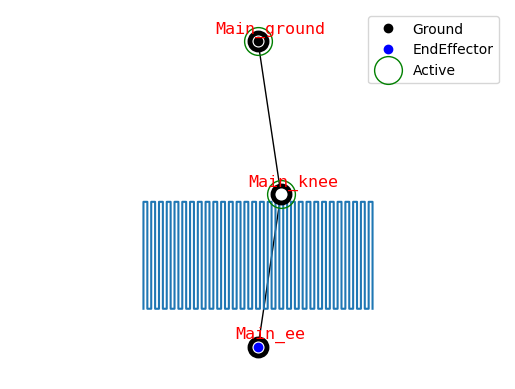

In [3]:
for _, trajectory in reward_manager.trajectories.items():
    plt.plot(trajectory[50:, 0], trajectory[50:, 2])
gm = get_preset_by_index_with_bounds(-1)
values = gm.generate_central_from_mutation_range()
graph = gm.get_graph(values)
draw_joint_point(graph)
plt.show("trajectories.png")

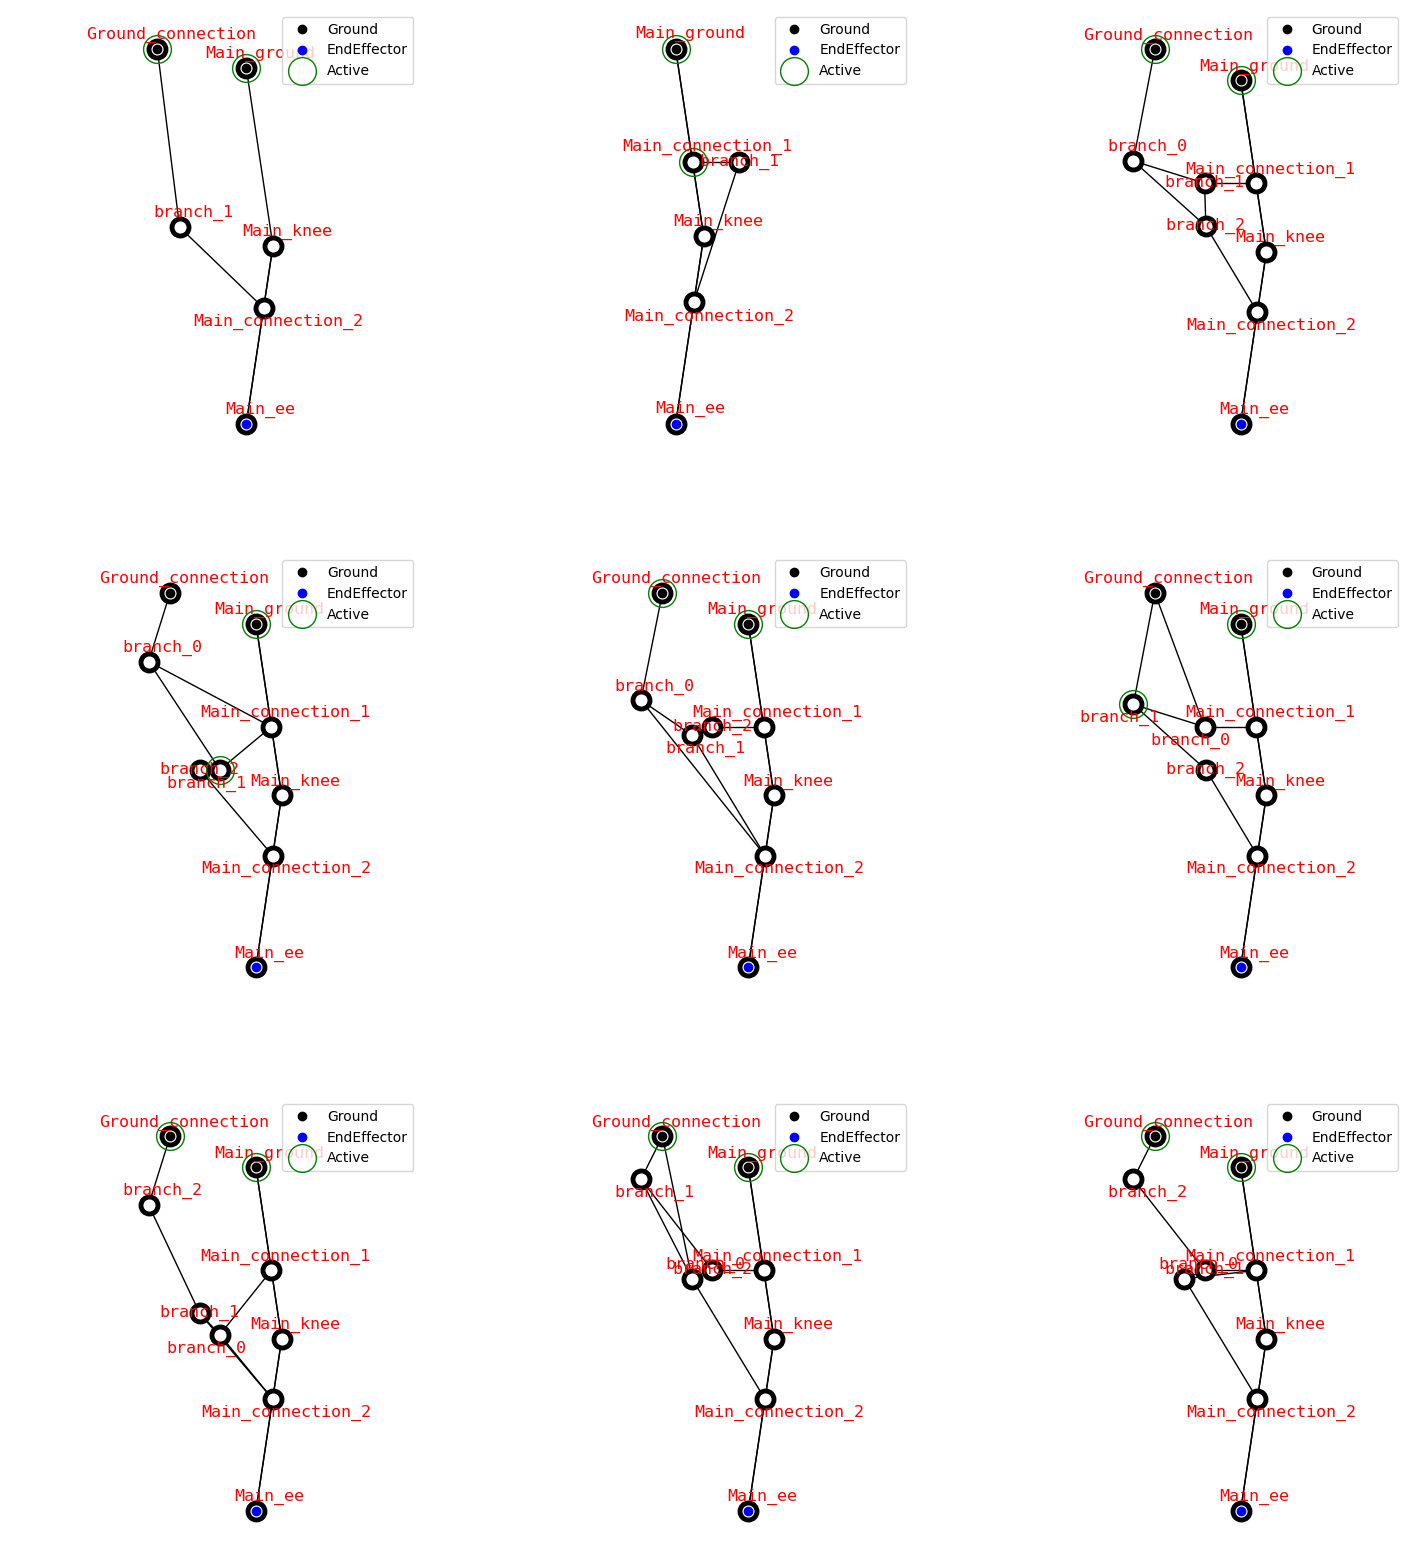

In [4]:
plt.figure(figsize=(18, 20))
for i in range(9):
    gm = get_preset_by_index_with_bounds(i)
    values = gm.generate_central_from_mutation_range()
    graph = gm.get_graph(values)
    plt.subplot(3, 3, i+1)
    draw_joint_point(graph)

plt.show("topologies.png")

In [5]:
pin.seed(1)
N_PROCESS = 8
population_size = 64
n_generations = 30
for i in range(0,9):
    pool = multiprocessing.Pool(N_PROCESS)
    runner = StarmapParallelization(pool.starmap)
    topology_index = i
    gm = get_preset_by_index_with_bounds(topology_index)
    # activate multiprocessing

    # create the problem for the current optimization
    problem = MultiCriteriaProblem(gm, builder, reward_manager,
                                soft_constrain, elementwise_runner=runner, Actuator=builder.actuator['default'])

    saver = ProblemSaver(problem, f"jacobian_workspace\\all_topologies_30gen_64pop\\topology_{topology_index}", True)
    saver.save_nonmutable()
    algorithm = AGEMOEA2(pop_size=population_size, save_history=True)
    optimizer = PymooOptimizer(problem, algorithm, saver)

    res = optimizer.run(
        True, **{
            "seed": 2,
            "termination": ("n_gen", n_generations),
            "verbose": True
        })

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       64 |      5 |             - |             -
     2 |      128 |     11 |  0.1823888739 |         ideal
     3 |      192 |     20 |  0.2552256313 |         ideal
     4 |      256 |     31 |  0.3642652518 |         ideal
     5 |      320 |     35 |  0.0110627827 |             f
     6 |      384 |     48 |  0.0071916441 |             f
     7 |      448 |     42 |  0.0273421367 |         ideal
     8 |      512 |     52 |  0.0047785051 |             f
     9 |      576 |     64 |  0.0037340021 |             f
    10 |      640 |     64 |  0.0195425583 |         ideal
    11 |      704 |     64 |  0.1234682782 |         ideal
    12 |      768 |     64 |  0.0022407825 |             f
    13 |      832 |     64 |  0.0233751935 |         ideal
    14 |      896 |     64 |  0.0620960850 |         ideal
    15 |      960 |     64 |  0.0026497453 |             f
    16 |     1024 |     64 |  0.0247361871 |         ide